In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.losses import CategoricalCrossentropy as cce

In [15]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


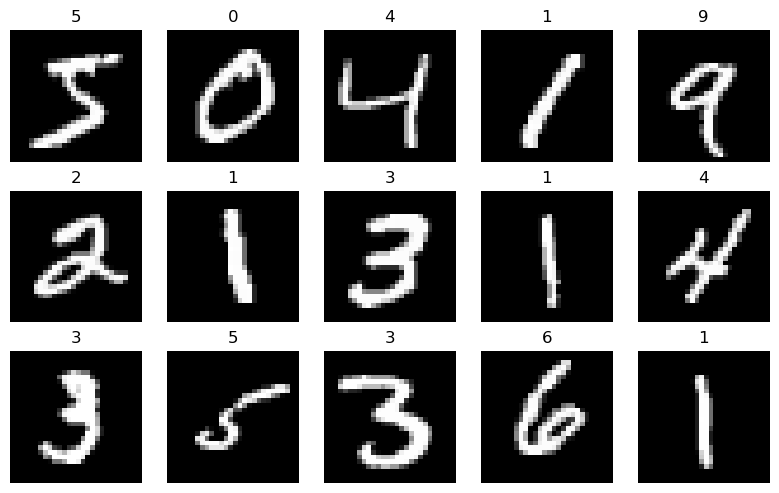

In [17]:
# 이미지 시각화할 때 사용하면 좋은 코드
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
    ax = axes[i//5, i%5] # 행과 열의 위치를 정하는 코드
    ax.imshow(X_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

In [18]:
# MinMax 스케일링(y는 타겟이기 때문에 스케일링 안함)
X_train = X_train/255
X_test = X_test/255

In [20]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000, 10)


In [19]:
# onehot 인코딩(범주형 데이터이기 때문에)
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss=cce(from_logits=True),
              metrics=['acc', 'f1_score'])

In [22]:
# batch_size는 정한 사이즈대로 나눠서 학습을 함
history = model.fit(X_train, y_train,epochs=50,
                    batch_size=128,
                    validation_split=0.3)

Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.6573 - f1_score: 0.6417 - loss: 1.0870 - val_acc: 0.9181 - val_f1_score: 0.9174 - val_loss: 0.2774
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9307 - f1_score: 0.9299 - loss: 0.2467 - val_acc: 0.9422 - val_f1_score: 0.9419 - val_loss: 0.2006
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9463 - f1_score: 0.9459 - loss: 0.1807 - val_acc: 0.9470 - val_f1_score: 0.9466 - val_loss: 0.1817
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9596 - f1_score: 0.9593 - loss: 0.1369 - val_acc: 0.9502 - val_f1_score: 0.9497 - val_loss: 0.1727
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9694 - f1_score: 0.9691 - loss: 0.1047 - val_acc: 0.9563 - val_f1_score: 0.9560 - val_loss: 0.1485
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9709 - f1_score: 0.9707 - loss: 0.0968 - val_acc: 0.9593 - val_f1_score: 0.9591 - val_loss: 0.1448
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [23]:
history.history.keys()

dict_keys(['acc', 'f1_score', 'loss', 'val_acc', 'val_f1_score', 'val_loss'])

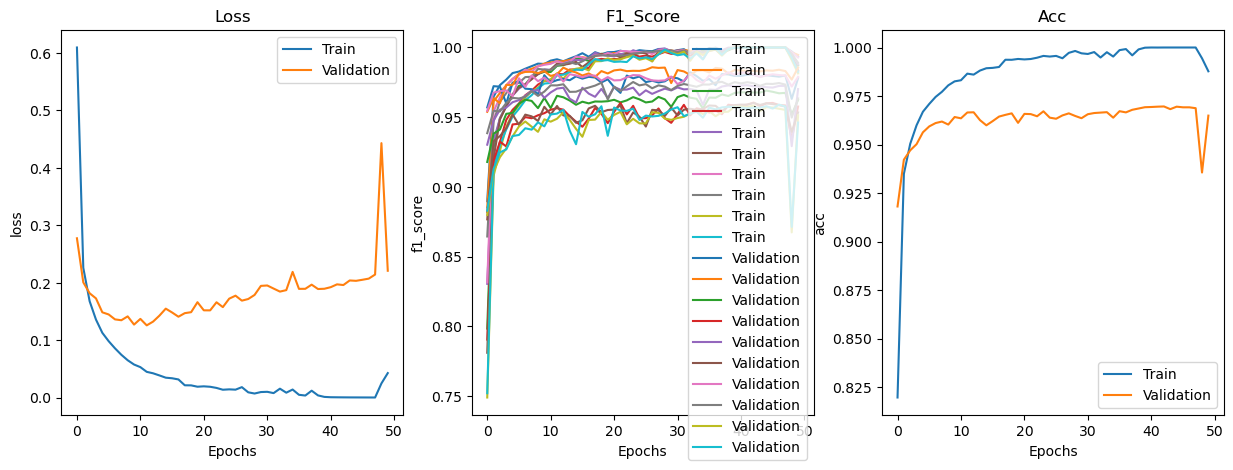

In [24]:
fig = plt.figure(figsize=(15,5))

## loss
ax1 = fig.add_subplot(1,3,1)
ax1.plot(history.history['loss'], label='Train')
ax1.plot(history.history['val_loss'], label='Validation')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.legend()

## f1_score # 클래스마다 있기 때문에 총 10씩 나옴
ax1 = fig.add_subplot(1,3,2)
ax1.plot(history.history['f1_score'], label='Train')
ax1.plot(history.history['val_f1_score'], label='Validation')
ax1.set_title('F1_Score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('f1_score')
ax1.legend()

## acc
ax1 = fig.add_subplot(1,3,3)
ax1.plot(history.history['acc'], label='Train')
ax1.plot(history.history['val_acc'], label='Validation')
ax1.set_title('Acc')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('acc')
ax1.legend()

plt.show()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
result = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(result, axis=-1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.97      0.97      1032
           3       0.95      0.98      0.96      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.94      0.96       892
           6       0.97      0.98      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.97      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [32]:
## CNN 모델 만들기
model = Sequential()
# Conv2D는 2차원 이미지와 3차원 이미지 모두 사용
# Conv2D(노드개수, 필터사이즈, 활성화함수, 
# 입력shape정보(3차원으로 넣어야하고 흑백이미지일 때는 1로 지정)
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
# Pooling(사이즈 지정)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2)))
# dropout은 중간중간에 넣어주면 됨
# Dense층을 만들어 줄 때 input층을 층만 만들어 주면 됨
model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(10, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [33]:
model.compile(optimizer='adam',
              loss=cce(from_logits=True),
              metrics=['acc', 'f1_score'])

In [35]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           8,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,344 (317.75 KB)

 Trainable params: 27,114 (105.91 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,230 (211.84 KB)

In [36]:
history = model.fit(X_train, y_train, epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - acc: 0.9851 - f1_score: 0.9850 - loss: 0.0482 - val_acc: 0.9905 - val_f1_score: 0.9904 - val_loss: 0.0348
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - acc: 0.9864 - f1_score: 0.9863 - loss: 0.0417 - val_acc: 0.9898 - val_f1_score: 0.9896 - val_loss: 0.0342
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - acc: 0.9865 - f1_score: 0.9864 - loss: 0.0431 - val_acc: 0.9900 - val_f1_score: 0.9899 - val_loss: 0.0345
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - acc: 0.9874 - f1_score: 0.9873 - loss: 0.0405 - val_acc: 0.9882 - val_f1_score: 0.9881 - val_loss: 0.0372
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - acc: 0.9883 - f1_score: 0.9882 - loss: 0.0370 - val_acc: 0.9908 - val_f1_score: 0.9907 - val_loss: 0.0325
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - acc: 0.9894 - f1_score: 0.9894 - loss: 0.0343 - val_acc: 0.9914 - val_f1_score: 0.9913 - val_loss: 0.0334
Epoch 7/10
375/375 ━━━━━━━━━

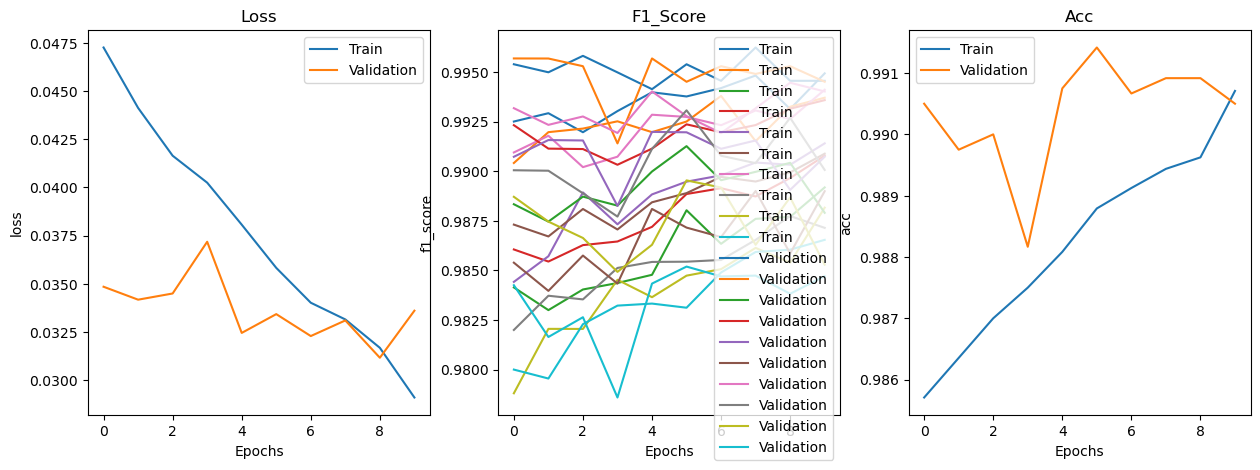

In [37]:
fig = plt.figure(figsize=(15,5))

## loss
ax1 = fig.add_subplot(1,3,1)
ax1.plot(history.history['loss'], label='Train')
ax1.plot(history.history['val_loss'], label='Validation')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.legend()

## f1_score # 클래스마다 있기 때문에 총 10씩 나옴
ax1 = fig.add_subplot(1,3,2)
ax1.plot(history.history['f1_score'], label='Train')
ax1.plot(history.history['val_f1_score'], label='Validation')
ax1.set_title('F1_Score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('f1_score')
ax1.legend()

## acc
ax1 = fig.add_subplot(1,3,3)
ax1.plot(history.history['acc'], label='Train')
ax1.plot(history.history['val_acc'], label='Validation')
ax1.set_title('Acc')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('acc')
ax1.legend()

plt.show()

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
result = model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(result, axis=-1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [39]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 33s 0us/step


In [40]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [41]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [42]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

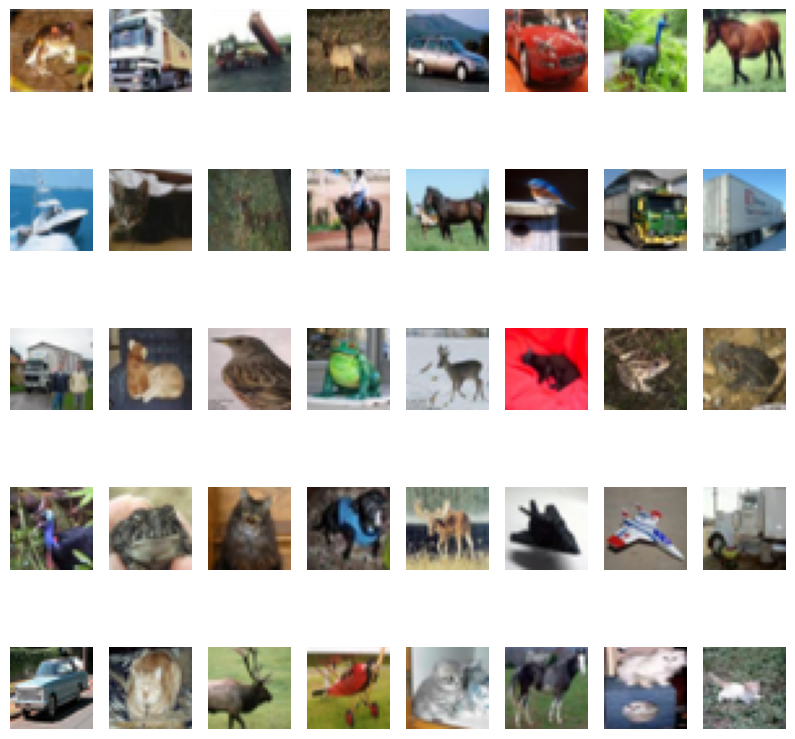

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for i in range(40):
    plt.subplot(5,8, i+1)
    # plt.title(labels[y_train[i][0]])
    plt.axis('off')
    plt.imshow(X_train[i])

plt.show()

In [48]:
## 이미지 전처리
X_train = X_train/255
X_test = X_test/255

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
# DNN
DNN_model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),
])

## CNN(과적합이 잘 걸리기 때문에 Dropout을 자주 써주는 게 좋음)
CNN_model = Sequential()
CNN_model.add(Conv2D(64, kernel_size=(3,3), activation='relu', 
                     input_shape=(32,32,3), padding='same', strides=(1,1)))
# pool_size가 2,2인 것은 사이즈를 반으로 줄이겠다는 뜻
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
# padding 중 valid는 안 쓴다는 것
CNN_model.add(Conv2D(32, kernel_size=(5,5), activation='relu', 
                     padding='valid', strides=(1,1)))
CNN_model.add(AveragePooling2D(pool_size=(2,2)))
CNN_model.add(Dropout(0.3))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dropout(0.4))
CNN_model.add(Dense(10, activation='softmax'))

In [55]:
DNN_model.compile(optimizer='adam',
                  loss=cce(from_logits=True),
                  metrics=['acc', 'f1_score'])

In [56]:
CNN_model.compile(optimizer='adam',
                  loss=cce(from_logits=True),
                  metrics=['acc', 'f1_score'])

In [57]:
DNN_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 404,378 (1.54 MB)

 Trainable params: 404,378 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
CNN_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 32)          │          51,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 32)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 218,474 (853.41 KB)

 Trainable params: 218,474 (853.41 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
DNN_history = DNN_model.fit(X_train, y_train, epochs=50,
                            batch_size=128,
                            validation_split=0.3)

CNN_history = CNN_model.fit(X_train, y_train, epochs=20,
                            batch_size=128,
                            validation_split=0.3)

Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


274/274 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - acc: 0.1673 - f1_score: 0.1225 - loss: 2.1998 - val_acc: 0.2393 - val_f1_score: 0.1729 - val_loss: 2.0268
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.2796 - f1_score: 0.2508 - loss: 1.9392 - val_acc: 0.3353 - val_f1_score: 0.3254 - val_loss: 1.8188
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.3471 - f1_score: 0.3396 - loss: 1.7825 - val_acc: 0.3748 - val_f1_score: 0.3723 - val_loss: 1.7304
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.3853 - f1_score: 0.3793 - loss: 1.7062 - val_acc: 0.3863 - val_f1_score: 0.3733 - val_loss: 1.7021
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.4022 - f1_score: 0.3955 - loss: 1.6521 - val_acc: 0.4047 - val_f1_score: 0.3937 - val_loss: 1.6525
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.4124 - f1_score: 0.4054 - loss: 1.6229 - val_acc: 0.4160 - val_f1_score: 0.4036 - val_loss: 1.6339
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

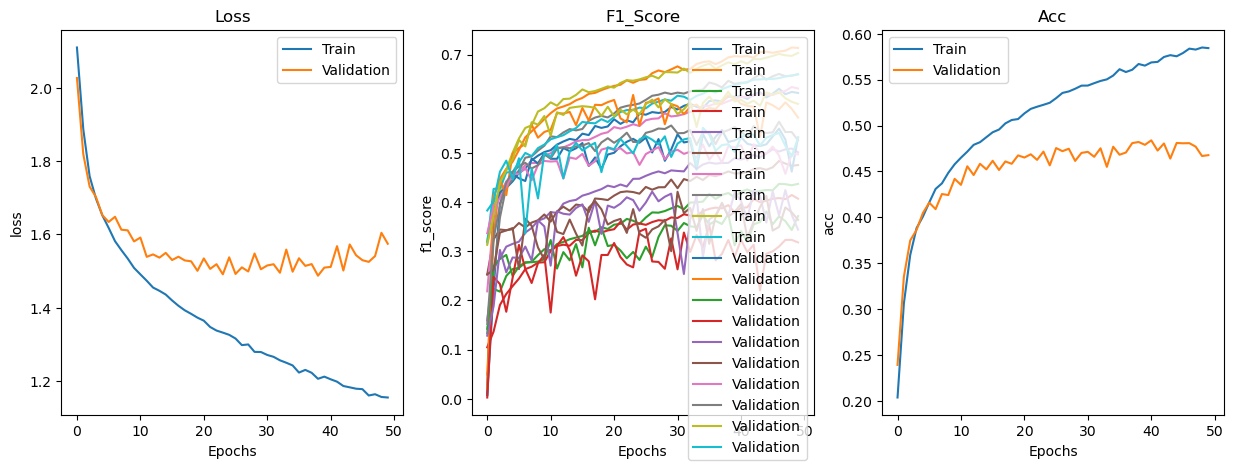

In [60]:
fig = plt.figure(figsize=(15,5))

## loss
ax1 = fig.add_subplot(1,3,1)
ax1.plot(DNN_history.history['loss'], label='Train')
ax1.plot(DNN_history.history['val_loss'], label='Validation')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.legend()

## f1_score # 클래스마다 있기 때문에 총 10씩 나옴
ax1 = fig.add_subplot(1,3,2)
ax1.plot(DNN_history.history['f1_score'], label='Train')
ax1.plot(DNN_history.history['val_f1_score'], label='Validation')
ax1.set_title('F1_Score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('f1_score')
ax1.legend()

## acc
ax1 = fig.add_subplot(1,3,3)
ax1.plot(DNN_history.history['acc'], label='Train')
ax1.plot(DNN_history.history['val_acc'], label='Validation')
ax1.set_title('Acc')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('acc')
ax1.legend()

plt.show()

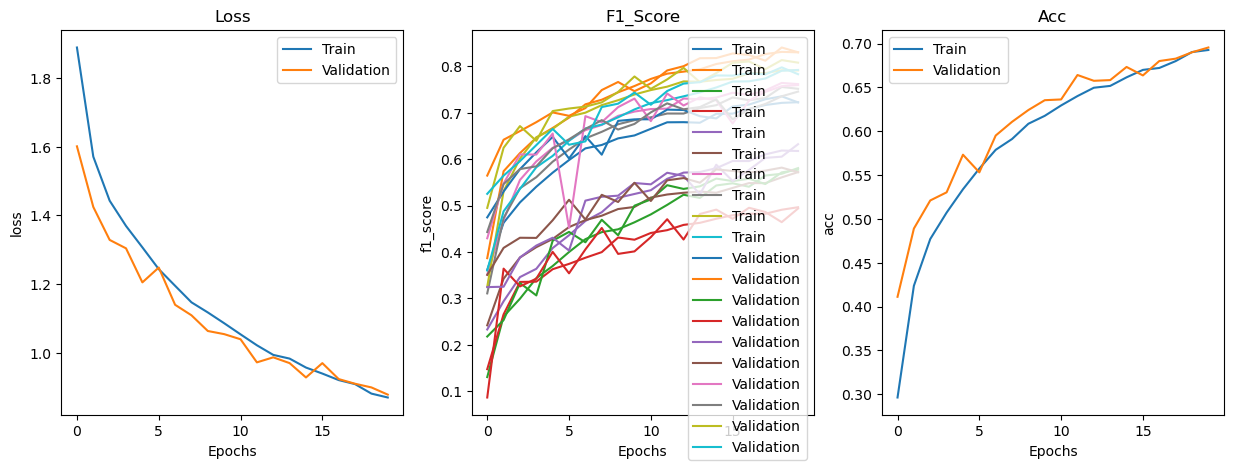

In [61]:
fig = plt.figure(figsize=(15,5))

## loss
ax1 = fig.add_subplot(1,3,1)
ax1.plot(CNN_history.history['loss'], label='Train')
ax1.plot(CNN_history.history['val_loss'], label='Validation')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.legend()

## f1_score # 클래스마다 있기 때문에 총 10씩 나옴
ax1 = fig.add_subplot(1,3,2)
ax1.plot(CNN_history.history['f1_score'], label='Train')
ax1.plot(CNN_history.history['val_f1_score'], label='Validation')
ax1.set_title('F1_Score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('f1_score')
ax1.legend()

## acc
ax1 = fig.add_subplot(1,3,3)
ax1.plot(CNN_history.history['acc'], label='Train')
ax1.plot(CNN_history.history['val_acc'], label='Validation')
ax1.set_title('Acc')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('acc')
ax1.legend()

plt.show()

In [63]:
from sklearn.metrics import classification_report
CNN_result = CNN_model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(CNN_result, axis=-1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1000
           1       0.81      0.84      0.82      1000
           2       0.60      0.52      0.56      1000
           3       0.52      0.47      0.49      1000
           4       0.62      0.63      0.63      1000
           5       0.61      0.55      0.58      1000
           6       0.71      0.82      0.77      1000
           7       0.78      0.72      0.75      1000
           8       0.75      0.83      0.79      1000
           9       0.79      0.78      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



In [64]:
from sklearn.metrics import classification_report
DNN_result = DNN_model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(DNN_result, axis=-1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
              precision    recall  f1-score   support

           0       0.52      0.57      0.54      1000
           1       0.71      0.45      0.55      1000
           2       0.31      0.42      0.36      1000
           3       0.31      0.33      0.32      1000
           4       0.51      0.24      0.33      1000
           5       0.40      0.37      0.38      1000
           6       0.42      0.67      0.52      1000
           7       0.65      0.42      0.51      1000
           8       0.52      0.69      0.60      1000
           9       0.55      0.51      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.49      0.47      0.46     10000
weighted avg       0.49      0.47      0.46     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
예측 결과 : bird
실제 결과 : bird


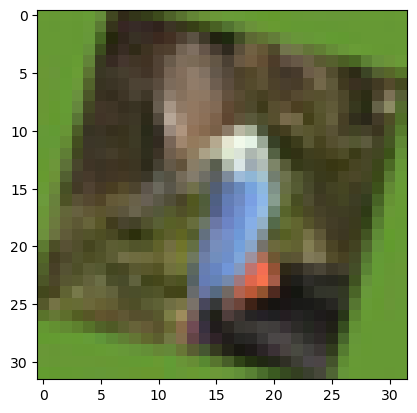

airplane : 1.13 %
automobile : 0.29 %
bird : 48.3 %
cat : 7.66 %
deer : 5.61 %
dog : 6.72 %
frog : 28.93 %
horse : 0.73 %
ship : 0.34 %
truck : 0.3 %


In [86]:
import random
num = random.randint(0,9999)

pred = CNN_model.predict(np.array([X_test[num]]))

print("예측 결과 :", labels[pred.argmax()])
print("실제 결과 :", labels[y_test[num].argmax()])
plt.imshow(X_test[num])
plt.show()

for i, pro in enumerate(pred[0]):
    print(labels[i], ':', round(pro * 100, 2), '%')
    

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout
# DNN
DNN_model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(10, activation='softmax'),
])

## CNN(과적합이 잘 걸리기 때문에 Dropout을 자주 써주는 게 좋음)
CNN_model = Sequential()
CNN_model.add(Conv2D(64, kernel_size=(3,3), activation='relu', 
                     input_shape=(32,32,3), padding='same', strides=(1,1)))
# pool_size가 2,2인 것은 사이즈를 반으로 줄이겠다는 뜻
CNN_model.add(MaxPooling2D(pool_size=(2,2)))
# padding 중 valid는 안 쓴다는 것
CNN_model.add(Conv2D(32, kernel_size=(5,5), activation='relu', 
                     padding='valid', strides=(1,1)))
CNN_model.add(AveragePooling2D(pool_size=(2,2)))
CNN_model.add(Dropout(0.3))
CNN_model.add(Flatten())
CNN_model.add(Dense(128, activation='relu'))
CNN_model.add(Dense(64, activation='relu'))
CNN_model.add(Dense(32, activation='relu'))
CNN_model.add(Dropout(0.4))
CNN_model.add(Dense(10, activation='softmax'))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [88]:
DNN_model.compile(optimizer='adam',
                  loss=cce(from_logits=True),
                  metrics=['acc', 'f1_score'])

In [89]:
CNN_model.compile(optimizer='adam',
                  loss=cce(from_logits=True),
                  metrics=['acc', 'f1_score'])

In [90]:
DNN_history = DNN_model.fit(X_train, y_train, epochs=50,
                            batch_size=128,
                            validation_split=0.3)

CNN_history = CNN_model.fit(X_train, y_train, epochs=40,
                            batch_size=128,
                            validation_split=0.3)

Epoch 1/50


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py:559: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


274/274 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - acc: 0.1560 - f1_score: 0.1214 - loss: 2.2184 - val_acc: 0.2673 - val_f1_score: 0.2525 - val_loss: 1.9954
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.3025 - f1_score: 0.2889 - loss: 1.9026 - val_acc: 0.3353 - val_f1_score: 0.3122 - val_loss: 1.8426
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.3630 - f1_score: 0.3510 - loss: 1.7751 - val_acc: 0.3816 - val_f1_score: 0.3707 - val_loss: 1.7407
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - acc: 0.3902 - f1_score: 0.3767 - loss: 1.6928 - val_acc: 0.3813 - val_f1_score: 0.3676 - val_loss: 1.7106
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.4049 - f1_score: 0.3943 - loss: 1.6430 - val_acc: 0.4006 - val_f1_score: 0.3900 - val_loss: 1.6618
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - acc: 0.4148 - f1_score: 0.4063 - loss: 1.6117 - val_acc: 0.4203 - val_f1_score: 0.4074 - val_loss: 1.6188
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

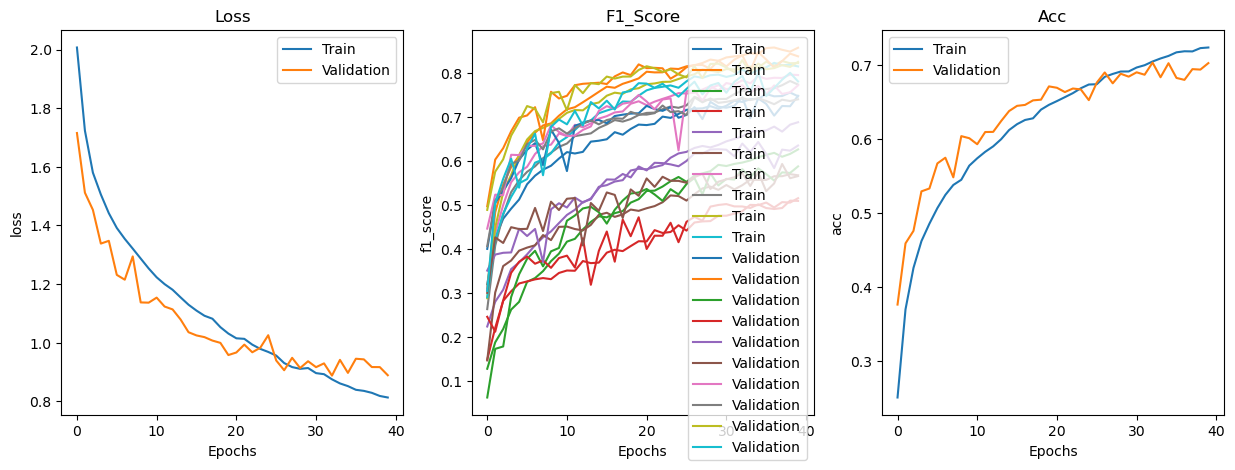

In [91]:
fig = plt.figure(figsize=(15,5))

## loss
ax1 = fig.add_subplot(1,3,1)
ax1.plot(CNN_history.history['loss'], label='Train')
ax1.plot(CNN_history.history['val_loss'], label='Validation')
ax1.set_title('Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('loss')
ax1.legend()

## f1_score # 클래스마다 있기 때문에 총 10씩 나옴
ax1 = fig.add_subplot(1,3,2)
ax1.plot(CNN_history.history['f1_score'], label='Train')
ax1.plot(CNN_history.history['val_f1_score'], label='Validation')
ax1.set_title('F1_Score')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('f1_score')
ax1.legend()

## acc
ax1 = fig.add_subplot(1,3,3)
ax1.plot(CNN_history.history['acc'], label='Train')
ax1.plot(CNN_history.history['val_acc'], label='Validation')
ax1.set_title('Acc')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('acc')
ax1.legend()

plt.show()

In [92]:
from sklearn.metrics import classification_report
CNN_result = CNN_model.predict(X_test)
print(classification_report(np.argmax(y_test, axis=-1), np.argmax(CNN_result, axis=-1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1000
           1       0.84      0.82      0.83      1000
           2       0.59      0.55      0.57      1000
           3       0.50      0.47      0.48      1000
           4       0.62      0.67      0.65      1000
           5       0.59      0.56      0.57      1000
           6       0.78      0.79      0.79      1000
           7       0.77      0.75      0.76      1000
           8       0.83      0.80      0.81      1000
           9       0.73      0.85      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
예측 결과 : bird
실제 결과 : bird


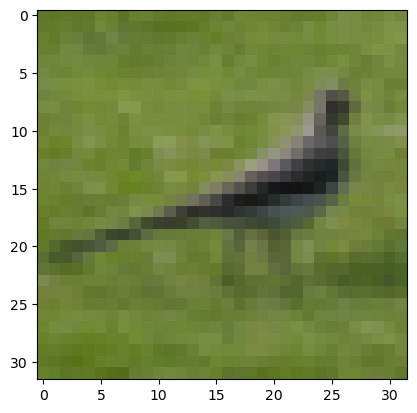

airplane : 0.83 %
automobile : 0.0 %
bird : 77.5 %
cat : 1.64 %
deer : 17.14 %
dog : 0.66 %
frog : 2.08 %
horse : 0.13 %
ship : 0.01 %
truck : 0.0 %


In [93]:
import random
num = random.randint(0,9999)

pred = CNN_model.predict(np.array([X_test[num]]))

print("예측 결과 :", labels[pred.argmax()])
print("실제 결과 :", labels[y_test[num].argmax()])
plt.imshow(X_test[num])
plt.show()

for i, pro in enumerate(pred[0]):
    print(labels[i], ':', round(pro * 100, 2), '%')